# MOOC 2015 - Dimension Active / Reflective

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth=1000

# Active LS

In [2]:
active_fr = pd.read_csv('./Features/active_features_inliers.csv',sep=",",index_col=False,error_bad_lines=False)
active_fr.drop('anon_screen_name.1', axis=1, inplace=True)
active_fr.set_index('anon_screen_name',inplace=True)
active_fr.head()

,nbr_events,nbr_week,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions
anon_screen_name,,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,2,0,0.000000,0.0,0.000000,0,1
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,32,6,0.366667,0.0,0.000000,0,93
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,9,5,1.033333,5.0,1.000000,0,1
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,309,23,8.566667,20.0,0.869565,0,13
0007c3a1163a8b19781443bde21b785900f56814,127,1.0,9,3,2.116667,3.0,1.000000,0,2


In [3]:
active=active_fr[['nbr_pause_video','nbr_problem_visit','problem_stay_min','nbr_problem_submit',
           'avg_problem_submit','nbr_forum_post' ]]
active.shape
# ,'nbr_sessions'

(32184, 6)

In [4]:
# 32184  after removing outliers
print(active_fr.shape)

(32184, 9)


## Normalization

In [5]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ActiveLS_norm=StandardScaler().fit_transform(ActiveLS)
ActiveLS_norm=MinMaxScaler().fit_transform(active)
# ActiveLS_redu = PCA(2).fit_transform(ActiveLS_norm)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Elbow

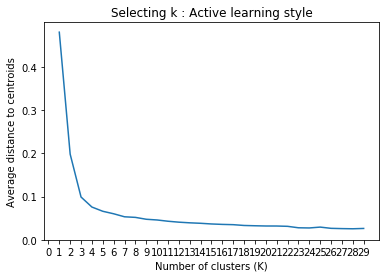

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
# from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.spatial.distance import cdist

AR_feature = ActiveLS_norm
clusters=range(1,30)
meandist=[]

for k in clusters:
    model=KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(AR_feature)
    clusassign=model.predict(AR_feature)
    meandist.append(sum(np.min(cdist(AR_feature, model.cluster_centers_, 'euclidean'), axis=1)) / AR_feature.shape[0])
#  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.figure(figsize=(6, 4))
plt.plot(clusters, meandist)
plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0, 0.5, 0.1))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average distance to centroids')
plt.title('Selecting k : active learning style')
plt.show()

## K-means

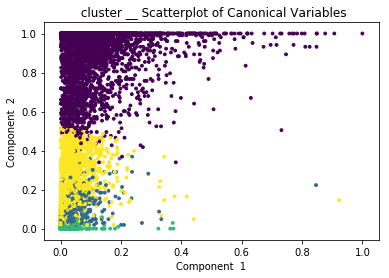

In [17]:
plot_columns = ActiveLS_norm
km_model=KMeans(init='k-means++', n_clusters=4, n_init=10)
km_model.fit(plot_columns)
plt.figure(figsize=(6, 4))
plt.scatter(x=plot_columns[:,2], y=plot_columns[:,3], c=km_model.labels_,s=8)
plt.xlabel('Component  1')
plt.ylabel('Component  2')
plt.title(' cluster __ Scatterplot of Canonical Variables')
plt.show()

model2=km_model

## Resulats 

In [18]:
# active.set_index('anon_screen_name',inplace=True)
cluslist=active_fr.index
labels=list(model2.labels_)
newlist=dict(zip(cluslist, labels))

newclus=pd.DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster_active']

newclus.reset_index(level=0, inplace=True)
newclus=newclus.rename(columns={'index':'anon_screen_name'})

active_fr.reset_index(level=0, inplace=True)
A_merged_train=pd.merge(active_fr, newclus, on='anon_screen_name')
A_merged_train.set_index("anon_screen_name",inplace=True)
A_merged_train.head(4)

,nbr_events,nbr_week,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,cluster_active
anon_screen_name,,,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,2,0,0.000000,0.0,0.000000,0,1,2
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,32,6,0.366667,0.0,0.000000,0,93,2
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,9,5,1.033333,5.0,1.000000,0,1,3
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,309,23,8.566667,20.0,0.869565,0,13,3


In [21]:
ALS=A_merged_train.groupby('cluster_active').agg({'mean'})
ALS

,nbr_events,nbr_week,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions
,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_active,,,,,,,,,
Moderate,523.123717,2.349558,46.481770,14.640531,51.574378,13.267434,0.929796,0.081416,13.484071
Strong,2814.693312,8.615924,206.118471,95.946815,370.181423,91.346497,0.949629,0.797771,50.189490
Very Weak,57.446595,0.846741,4.486722,1.090807,2.731609,0.039835,0.003142,0.012889,3.342412
Weak,451.613267,2.506351,38.763938,12.105152,48.487191,6.020466,0.508357,0.084686,13.297459


In [20]:
A_merged_train.cluster_active=A_merged_train.cluster_active.map({
                                                   2: 'Very Weak',
                                                   1: 'Weak',
                                                   3: 'Moderate',
                                                   0: 'Strong'
                                                   })

In [27]:
A_merged_train.cluster_active.value_counts()

Very Weak    20560
Moderate      5650
Strong        3140
Weak          2834
Name: cluster_active, dtype: int64

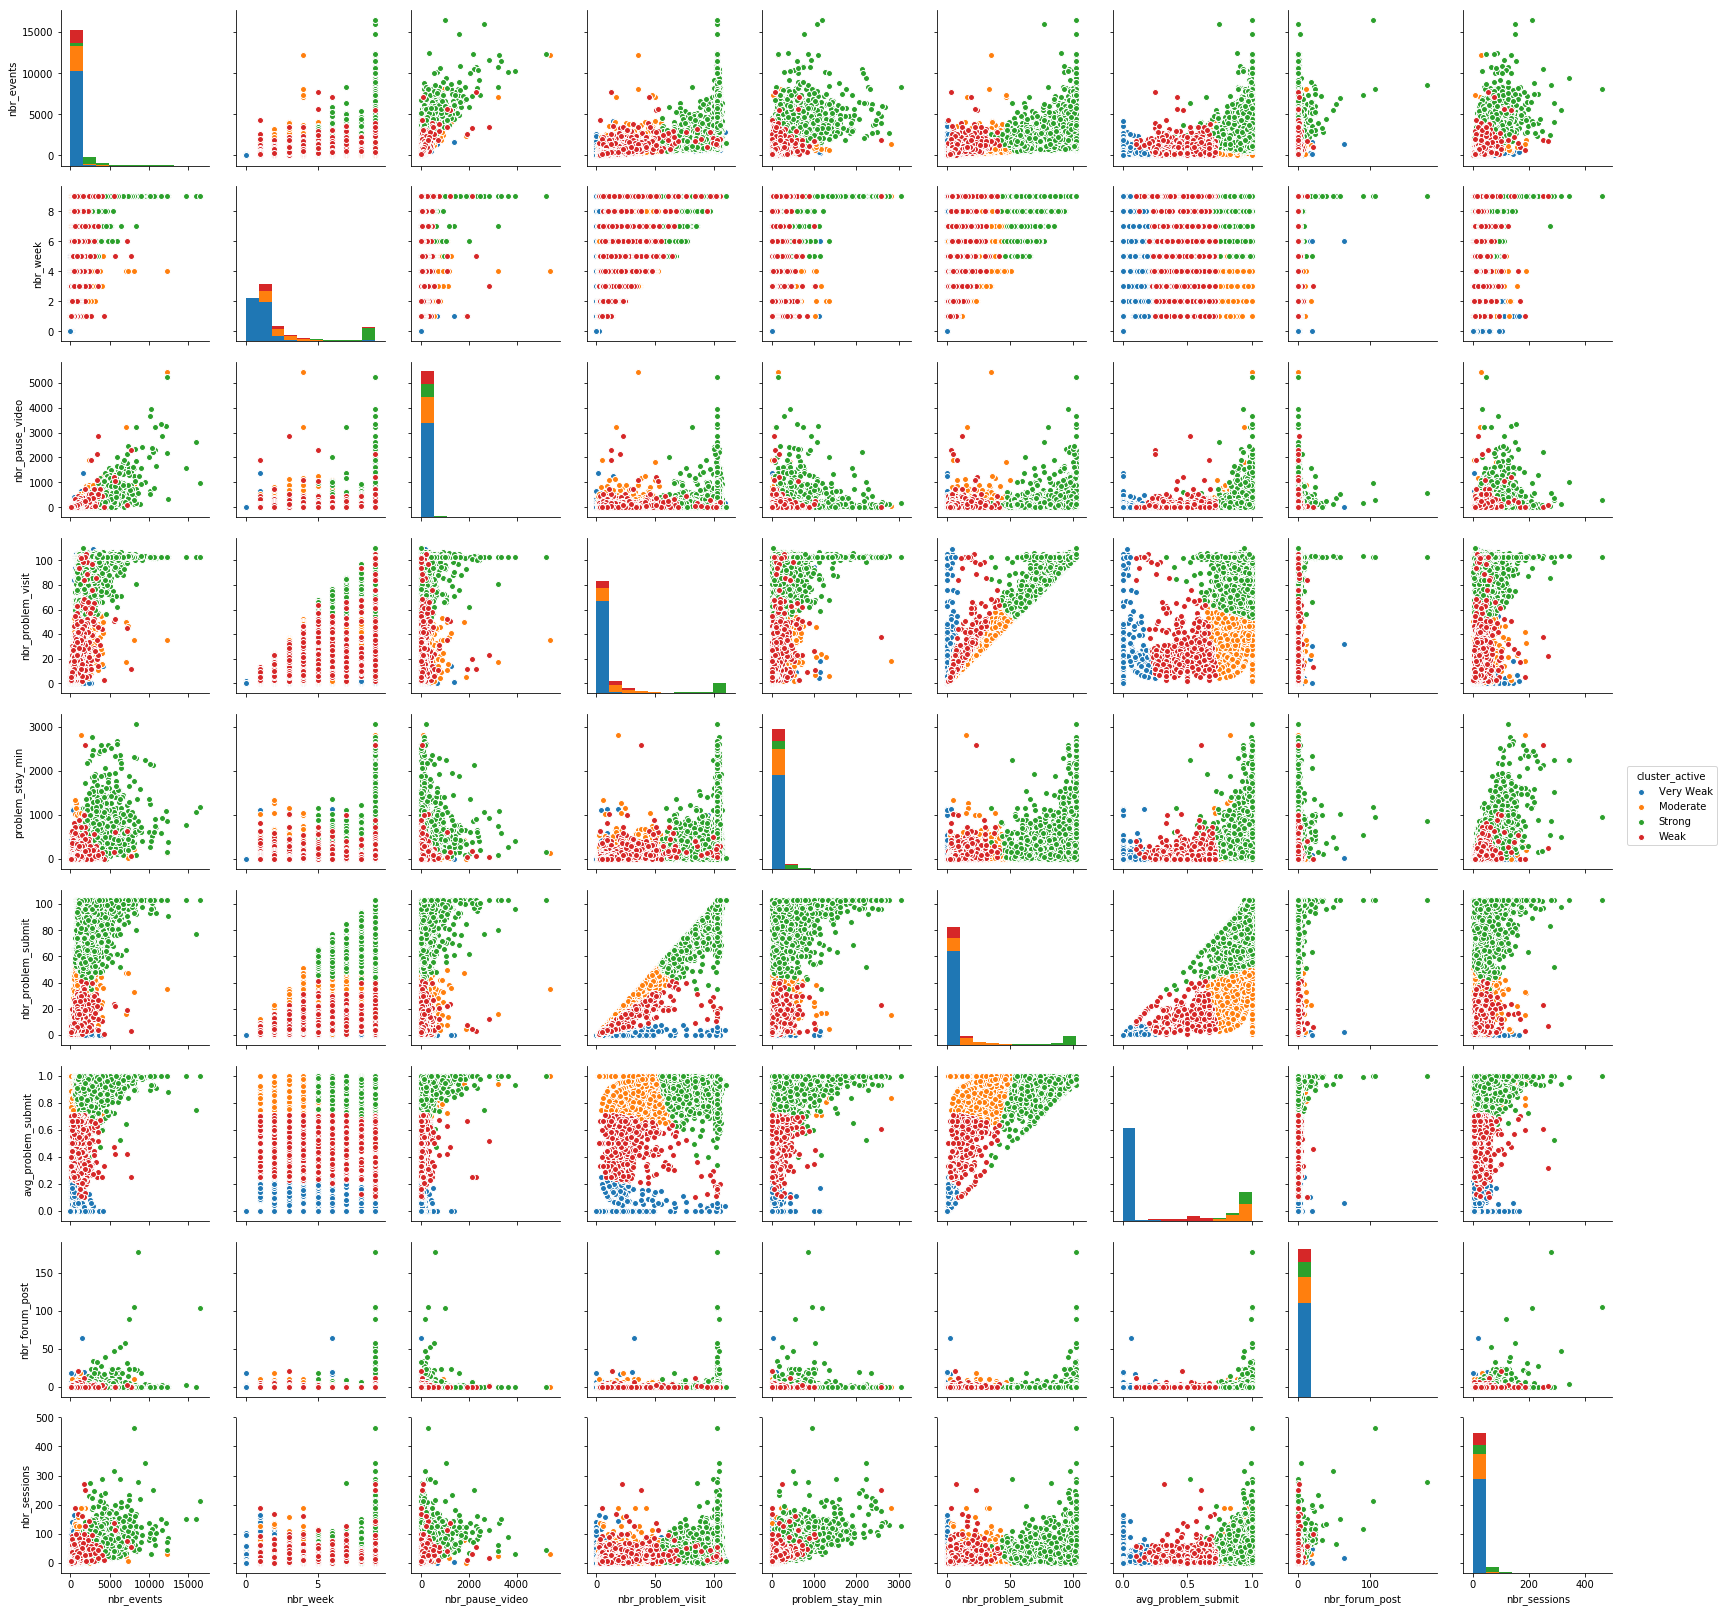

In [15]:
sns.pairplot(A_merged_train,hue= 'cluster_active')
plt.show()

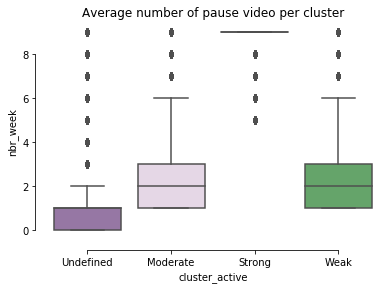

In [246]:
sns.boxplot(x="cluster_active", y="nbr_week", data=A_merged_train, palette="PRGn").set_title("Average number of pause video per cluster")
sns.despine(offset=10, trim=True)

In [54]:
from statsmodels.multivariate.manova import MANOVA

# feats_list  = ['length', 'nb_info']
# var_list = ['ages', 'sex']
endog, exog = np.asarray(active), np.asarray(A_merged_train.cluster_active)
manov = MANOVA(endog, exog)
r=manov.mv_test()
r.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
           x0           Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.3119 7.0000 32177.0000 10143.0252 0.0000
         Pillai's trace 0.6881 7.0000 32177.0000 10143.0252 0.0000
 Hotelling-Lawley trace 2.2066 7.0000 32177.0000 10143.0252 0.0000
    Roy's greatest root 2.2066 7.0000 32177.0000 10143.0252 0.0000
==================================================================

"""

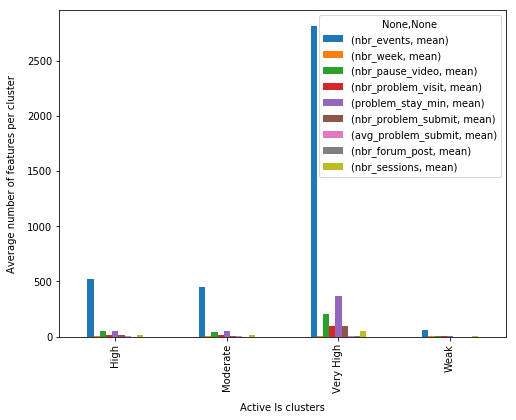

In [139]:
ax=ALS.plot(kind='bar',figsize=(8, 6),sharey=True, sharex=True)
ax.set_xlabel('Active ls clusters', labelpad=10) # Use argument `labelpad` to move label downwards.
ax.set_ylabel('Average number of features per cluster', labelpad=10)

## Certificat

In [23]:
Certs = pd.read_csv('./Input/StatLearning_Certs.csv',sep=",",index_col=False,error_bad_lines=False)
Certs.head()

,anon_screen_name,course_display_name,status
0,13641bfecade7ce327bbd9f3741cc7d89a23f535,HumanitiesandScience/StatLearning/Winter2015,downloadable
1,dc507496e34674ef7dd4e36d6b75e783e125375d,HumanitiesandScience/StatLearning/Winter2015,downloadable
2,102ca2b6efce896118c65a45b5c9948758472460,HumanitiesandScience/StatLearning/Winter2015,downloadable
3,c007f81373778ff12bb4e7d81e97c9998d86cbcc,HumanitiesandScience/StatLearning/Winter2015,downloadable
4,7884fff9c58018947d49a1eee8d06b20887fec97,HumanitiesandScience/StatLearning/Winter2015,downloadable


In [24]:
Certs_2015=Certs[Certs.course_display_name=="HumanitiesandScience/StatLearning/Winter2015"]
Certs_2015.shape

(2601, 3)

In [25]:
Certs_2015.drop('course_display_name', axis=1, inplace=True)
Certs_2015.drop('status', axis=1, inplace=True)
Certs_2015['certs']=1
Certs_2015.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel pac

,anon_screen_name,certs
0,13641bfecade7ce327bbd9f3741cc7d89a23f535,1
1,dc507496e34674ef7dd4e36d6b75e783e125375d,1
2,102ca2b6efce896118c65a45b5c9948758472460,1
3,c007f81373778ff12bb4e7d81e97c9998d86cbcc,1
4,7884fff9c58018947d49a1eee8d06b20887fec97,1


In [26]:
A_merged_train.reset_index(level=0, inplace=True)
# A_merged_train.drop('index', axis=1, inplace=True)
A_merged_train_certs=pd.merge(A_merged_train, Certs_2015,how="left", on='anon_screen_name')
A_merged_train_certs.set_index("anon_screen_name",inplace=True)
A_merged_train_certs.head(4)

,nbr_events,nbr_week,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,cluster_active,certs
anon_screen_name,,,,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,2,0,0.000000,0.0,0.000000,0,1,Very Weak,NaN
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,32,6,0.366667,0.0,0.000000,0,93,Very Weak,NaN
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,9,5,1.033333,5.0,1.000000,0,1,Moderate,NaN
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,309,23,8.566667,20.0,0.869565,0,13,Moderate,NaN


In [30]:
A_merged_train_certs.shape

(32184, 11)

In [31]:
A_merged_train_certs[(A_merged_train_certs.certs==1)].cluster_active.value_counts()

Strong       2596
Very Weak       2
Moderate        1
Name: cluster_active, dtype: int64

In [32]:
A_merged_train_certs.fillna(value=0,inplace=True)
A_merged_train_certs.reset_index(level=0, inplace=True)
A_merged_train_certs.groupby(['certs','cluster_active']).agg({"anon_screen_name":"count"})

anon_screen_name
certs cluster_active                  
0.0   Moderate                    5649
      Strong                       544
      Very Weak                  20558
      Weak                        2834
1.0   Moderate                       1
      Strong                      2596
      Very Weak                      2

# -------------------------------

# Reflective LS

In [8]:
reflective = pd.read_csv('./Features/reflective_features_inliers.csv',sep=",",index_col=False,error_bad_lines=False)
reflective.drop('anon_screen_name.1', axis=1, inplace=True)
reflective.set_index('anon_screen_name',inplace=True)
reflective['problem_show_stay']=reflective.problem_show_stay/60
reflective.head()

,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post
anon_screen_name,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,0.0,0.000000,0.000000,3,0
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,0.0,0.000000,0.000000,2,21
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,2.0,1.050000,0.400000,3,0
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,20.0,8.216667,0.869565,12,0
0007c3a1163a8b19781443bde21b785900f56814,127,1.0,1.0,0.000000,0.333333,5,0


In [9]:
reflective_fr=reflective[['nbr_problem_show', 'problem_show_stay',
       'avg_problem_show', 'outline', 'view_post']]

In [10]:
reflective_fr.head()

,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post
anon_screen_name,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,0.0,0.000000,0.000000,3,0
0003ece6f51872662ee9b366cd2a72434e01a139,0.0,0.000000,0.000000,2,21
00042c13310b03b6fc30c30c34efd2ad127517be,2.0,1.050000,0.400000,3,0
00055cea4f5db0c8569127d8ac89a7d130c730cf,20.0,8.216667,0.869565,12,0
0007c3a1163a8b19781443bde21b785900f56814,1.0,0.000000,0.333333,5,0


In [11]:
reflective_fr.shape

(32184, 5)

## Normalization

In [12]:
# ActiveLS_norm=StandardScaler().fit_transform(ActiveLS)
ReflectiveLS_norm=MinMaxScaler().fit_transform(reflective_fr)
# ReflectiveLS_redu = PCA(2).fit_transform(ReflectiveLS_norm)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Elbow

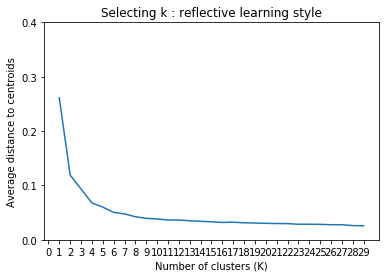

In [13]:
AR_feature = ReflectiveLS_norm
clusters=range(1,30)
meandist=[]

for k in clusters:
    model=KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(AR_feature)
    clusassign=model.predict(AR_feature)
    meandist.append(sum(np.min(cdist(AR_feature, model.cluster_centers_, 'euclidean'), axis=1)) / AR_feature.shape[0])
#  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.figure(figsize=(6, 4))
plt.plot(clusters, meandist)
plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0, 0.5, 0.1))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average distance to centroids')
plt.title('Selecting k : reflective learning style')
plt.show()

## K-means

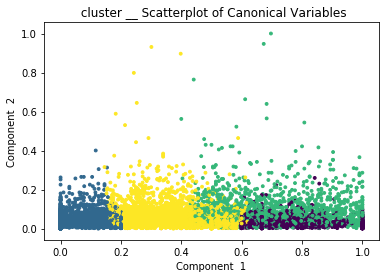

In [38]:
plot_columns = ReflectiveLS_norm
km_model=KMeans(init='k-means++', n_clusters=4, n_init=10)
km_model.fit(plot_columns)
plt.figure(figsize=(6, 4))
plt.scatter(x=plot_columns[:,2], y=plot_columns[:,3], c=km_model.labels_,s=8)
plt.xlabel('Component  1')
plt.ylabel('Component  2')
plt.title(' cluster __ Scatterplot of Canonical Variables')
plt.show()

model2=km_model

## Resulats

In [39]:
cluslist=reflective.index
labels=list(model2.labels_)
newlist=dict(zip(cluslist, labels))

newclus=pd.DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster_reflective']

newclus.reset_index(level=0, inplace=True)
newclus=newclus.rename(columns={'index':'anon_screen_name'})

reflective.reset_index(level=0, inplace=True)
R_merged_train=pd.merge(reflective, newclus, on='anon_screen_name')
R_merged_train.set_index("anon_screen_name",inplace=True)
R_merged_train.head(4)

,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_reflective
anon_screen_name,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,0.0,0.000000,0.000000,3,0,1
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,0.0,0.000000,0.000000,2,21,1
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,2.0,1.050000,0.400000,3,0,3
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,20.0,8.216667,0.869565,12,0,0


In [43]:
RLS=R_merged_train.groupby('cluster_reflective').agg({'mean'})
RLS

,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post
,mean,mean,mean,mean,mean,mean,mean
cluster_reflective,,,,,,,
Moderate,1046.334508,3.928797,11.455961,14.965455,0.380101,16.917115,17.997775
Strong,3059.796845,8.614511,67.691483,83.582082,0.706073,35.414511,80.191167
Very Weak,118.903732,1.107108,0.255131,0.331002,0.009259,4.676544,1.515149
Weak,402.662092,1.883531,7.451780,9.487080,0.813835,8.879080,4.441766


In [42]:
R_merged_train.cluster_reflective=R_merged_train.cluster_reflective.map({                                                  
                                                   1: 'Very Weak',
                                                   0: 'Weak',
                                                   3: 'Moderate',
                                                   2: 'Strong'})

In [45]:
R_merged_train.cluster_reflective.value_counts()

Very Weak    22510
Moderate      5393
Weak          2696
Strong        1585
Name: cluster_reflective, dtype: int64

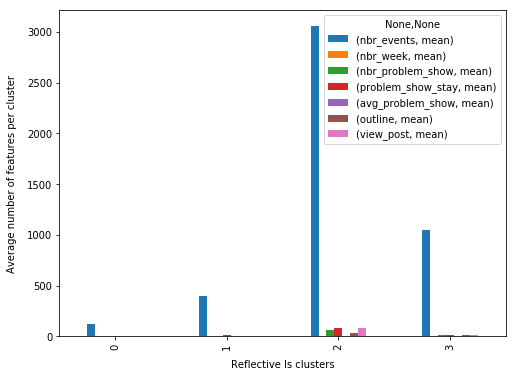

In [231]:
ax=RLS.plot(kind='bar',figsize=(8, 6),sharey=True, sharex=True)
ax.set_xlabel('Reflective ls clusters', labelpad=10) # Use argument `labelpad` to move label downwards.
ax.set_ylabel('Average number of features per cluster', labelpad=10)

## Certificat

In [46]:
R_merged_train.head()

,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_reflective
anon_screen_name,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,0.0,0.000000,0.000000,3,0,Very Weak
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,0.0,0.000000,0.000000,2,21,Very Weak
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,2.0,1.050000,0.400000,3,0,Moderate
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,20.0,8.216667,0.869565,12,0,Weak
0007c3a1163a8b19781443bde21b785900f56814,127,1.0,1.0,0.000000,0.333333,5,0,Moderate


In [48]:
R_merged_train.reset_index(level=0, inplace=True)
R_merged_train_certs=pd.merge(R_merged_train, Certs_2015,how="left", on='anon_screen_name')
R_merged_train_certs.set_index("anon_screen_name",inplace=True)
R_merged_train_certs.head(4)

,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_reflective,certs
anon_screen_name,,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,0.0,0.000000,0.000000,3,0,Very Weak,NaN
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,0.0,0.000000,0.000000,2,21,Very Weak,NaN
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,2.0,1.050000,0.400000,3,0,Moderate,NaN
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,20.0,8.216667,0.869565,12,0,Weak,NaN


In [49]:
R_merged_train_certs.fillna(value=0,inplace=True)
R_merged_train_certs.reset_index(level=0, inplace=True)

R_merged_train_certs.groupby(['certs','cluster_reflective']).agg({"anon_screen_name":"count"})

anon_screen_name
certs cluster_reflective                  
0.0   Moderate                        4453
      Strong                           395
      Very Weak                      22041
      Weak                            2696
1.0   Moderate                         940
      Strong                          1190
      Very Weak                        469

# ---------------------------------

# Active/Reflective Combine

In [50]:
R_merged_train_certs.head()

,anon_screen_name,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_reflective,certs
0,000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,0.0,0.000000,0.000000,3,0,Very Weak,0.0
1,0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,0.0,0.000000,0.000000,2,21,Very Weak,0.0
2,00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,2.0,1.050000,0.400000,3,0,Moderate,0.0
3,00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,20.0,8.216667,0.869565,12,0,Weak,0.0
4,0007c3a1163a8b19781443bde21b785900f56814,127,1.0,1.0,0.000000,0.333333,5,0,Moderate,0.0


In [51]:
AR=A_merged_train_certs.merge(R_merged_train_certs,how="outer", on ="anon_screen_name")
AR.head()

,anon_screen_name,nbr_events_x,nbr_week_x,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,...,certs_x,nbr_events_y,nbr_week_y,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_reflective,certs_y
0,000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,2,0,0.000000,0.0,0.000000,0,1,...,0.0,15,1.0,0.0,0.000000,0.000000,3,0,Very Weak,0.0
1,0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,32,6,0.366667,0.0,0.000000,0,93,...,0.0,382,1.0,0.0,0.000000,0.000000,2,21,Very Weak,0.0
2,00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,9,5,1.033333,5.0,1.000000,0,1,...,0.0,99,1.0,2.0,1.050000,0.400000,3,0,Moderate,0.0
3,00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,309,23,8.566667,20.0,0.869565,0,13,...,0.0,2214,5.0,20.0,8.216667,0.869565,12,0,Weak,0.0
4,0007c3a1163a8b19781443bde21b785900f56814,127,1.0,9,3,2.116667,3.0,1.000000,0,2,...,0.0,127,1.0,1.0,0.000000,0.333333,5,0,Moderate,0.0


## Export to XLS

In [52]:
AR.shape
ex=pd.ExcelWriter('15_Dim_AR_clustering.xlsx')
AR.to_excel(ex,sheet_name="Dimension_AR_2015")
ex.save()

In [262]:
AR.groupby(['certs_y','cluster_active','cluster_reflective']).agg({"anon_screen_name":"count"})

anon_screen_name
certs_y cluster_active cluster_reflective                  
0.0     Moderate       Moderate                        2511
                       Strong                            37
                       Undefined                        688
                       Weak                            2413
        Strong         Moderate                         179
                       Strong                           355
                       Undefined                          8
                       Weak                               2
        Undefined      Moderate                          57
                       Strong                             1
                       Undefined                      20471
                       Weak                              29
        Weak           Moderate                        1706
                       Strong                             2
                       Undefined                        874
                       Weak                             252
1.0     Moderate       Undefined                          1
        Strong         Moderate                         938
                       Strong                          1190
                       Undefined                        468
        Undefined      Moderate                           2

# Validation

In [57]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, Birch
from sklearn.cluster import DBSCAN, FeatureAgglomeration, MeanShift, SpectralClustering, MiniBatchKMeans
from sklearn import metrics, preprocessing
from math import floor

def agglomerative_clustering(projected_matrix, cluster):
    _agglomerative_clustering = AgglomerativeClustering(n_clusters=int(cluster),linkage='ward').fit(projected_matrix)
    return _agglomerative_clustering.labels_

def dbscan(projected_matrix):
    _dbscan = DBSCAN().fit(projected_matrix)
    return _dbscan.labels_

def k_means(projected_matrix, cluster):
    _kmeans = KMeans(init='k-means++',n_clusters=int(cluster), random_state=0).fit(projected_matrix)
    return _kmeans.labels_

def spectralClustering(projected_matrix, cluster):
    _spectral = SpectralClustering(n_clusters=int(cluster),
                                   affinity='precomputed').fit(projected_matrix)
    return _spectral.labels_

def birch(projected_matrix, cluster):
    _birch = Birch(n_clusters=int(cluster),threshold=0.01).fit(projected_matrix)
    return _birch.labels_

def feature_agglomeration(projected_matrix, cluster):
    _feature_agglomeration = FeatureAgglomeration(n_clusters=int(cluster)).fit(projected_matrix)
    return _feature_agglomeration.labels_

def miniBatchKMeans(projected_matrix, cluster):
    _miniBatchKMeans = MiniBatchKMeans(n_clusters=int(cluster),init='k-means++').fit(projected_matrix)
    return _miniBatchKMeans.labels_

def affinity_propagation(projected_matrix):
    _affinity_propagation = AffinityPropagation().fit(projected_matrix)
    return _affinity_propagation.labels_

def meanShift(projected_matrix):
    _mean_shift = MeanShift().fit(projected_matrix)
    return _mean_shift.labels_

def validation(k,algo,projected_matrix,projected_label,validation_matrix):
    print ('validation')
    metric_CH = metrics.calinski_harabaz_score(projected_matrix, projected_label)
    print ('validation:calinski_harabaz_score')
    metric_SC = metrics.silhouette_score(projected_matrix, projected_label, metric='euclidean',sample_size=10000, random_state=0)
    print ('validation:silhouette_score')
    metric_DB = metrics.davies_bouldin_score(projected_matrix, projected_label)
    print ('validation:davies_bouldin_score')
    validation_matrix.append((k,algo, metric_CH,metric_SC,metric_DB))
    
algorithms = [
    'kmeans',
    'miniBatch',
    'birch',
    'agglomerative'
]

matrix=ActiveLS_norm
res_validation = list()
nbr_clusters=range(4,5)
for algorithm_type in algorithms:
#     print (algorithm_type)
    for k_number in nbr_clusters:
#         print (k_number)
        if algorithm_type == 'agglomerative':
            labels = agglomerative_clustering(matrix, k_number)
        elif algorithm_type == 'kmeans':
#             print ("k-means processing ...")
            labels = k_means(matrix, k_number)            
        elif algorithm_type == 'miniBatch':
#             print ("miniBatch processing ...")
            labels = miniBatchKMeans(matrix, k_number)
        elif algorithm_type == 'birch':
            labels = birch(matrix, k_number)        
        elif algorithm_type == 'feature-agglomerative':
            labels = feature_agglomeration(matrix, k_number)            
        elif algorithm_type == 'dbscan':
            labels = dbscan(matrix)            
        elif algorithm_type == 'affinity-propagation':
            labels = affinity_propagation(matrix)           
        elif algorithm_type == 'meanShift':
            labels = meanShift(matrix)
        validation(k_number,algorithm_type,matrix,labels,res_validation)

validation
validation:calinski_harabaz_score
validation:silhouette_score
validation:davies_bouldin_score


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


validation
validation:calinski_harabaz_score
validation:silhouette_score
validation:davies_bouldin_score


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


validation
validation:calinski_harabaz_score
validation:silhouette_score
validation:davies_bouldin_score


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


validation
validation:calinski_harabaz_score
validation:silhouette_score
validation:davies_bouldin_score


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [59]:
df = pd.DataFrame(res_validation,columns=['Cluster', 'Algo','calinski_harabaz index','silhouette index','davies_bouldin index'])
df.set_index('Cluster', inplace=True)
df.head(10)

,Algo,calinski_harabaz index,silhouette index,davies_bouldin index
Cluster,,,,
4,kmeans,182350.035481,0.801414,0.564142
4,miniBatch,182096.070730,0.800768,0.570533
4,birch,87461.997239,0.742482,0.577410
4,agglomerative,164592.114421,0.794827,0.563060


# MANOVA

In [ ]:
# sns.pairplot(df,hue= 'HSGrad_cat')
# plt.show()

# Processing dimension

In [129]:
processing_dim=AR.copy()
processing_dim.head()

,anon_screen_name,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_forum_post,problem_stay_min,cluster_active,problem_show,view_post,problem_showanswer_stay,interview_stay,outline,cluster_reflective
0,0004d1505e4e9aed2b2e33d27346479310c1ba7e,54,5,21,0,69.888630,Moderate,16,3,214.254413,0.000000,3,Weak
1,000789663d3e93ec98006ee1ca20563a81a526e9,0,0,0,0,0.000000,Weak,0,0,0.000000,0.000000,2,Weak
2,0007b27c8634f9ddfd20639135457d0cae09bac6,39,22,39,0,130.524008,Moderate,40,0,1114.412145,709.427004,32,Moderate
3,000950b2cdcd5d2c6fd54e139c8af7f99416dff6,41,13,14,0,49.296207,Moderate,14,0,105.036606,0.000000,5,Weak
4,000f96eed76f92efa8255d7f0cd9583c45fca1a4,31,40,103,0,547.435138,Very High,177,2,18049.865863,1652.267815,39,Very High


In [130]:
processing_dim.drop('cluster_active', axis=1, inplace=True)
processing_dim.drop('cluster_reflective', axis=1, inplace=True)

In [131]:
processing_dim.head()

,anon_screen_name,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_forum_post,problem_stay_min,problem_show,view_post,problem_showanswer_stay,interview_stay,outline
0,0004d1505e4e9aed2b2e33d27346479310c1ba7e,54,5,21,0,69.888630,16,3,214.254413,0.000000,3
1,000789663d3e93ec98006ee1ca20563a81a526e9,0,0,0,0,0.000000,0,0,0.000000,0.000000,2
2,0007b27c8634f9ddfd20639135457d0cae09bac6,39,22,39,0,130.524008,40,0,1114.412145,709.427004,32
3,000950b2cdcd5d2c6fd54e139c8af7f99416dff6,41,13,14,0,49.296207,14,0,105.036606,0.000000,5
4,000f96eed76f92efa8255d7f0cd9583c45fca1a4,31,40,103,0,547.435138,177,2,18049.865863,1652.267815,39


## Normalization

In [132]:
processing_dim.set_index("anon_screen_name",inplace=True)
processing_dim_norm=MinMaxScaler().fit_transform(processing_dim)

## Elbow

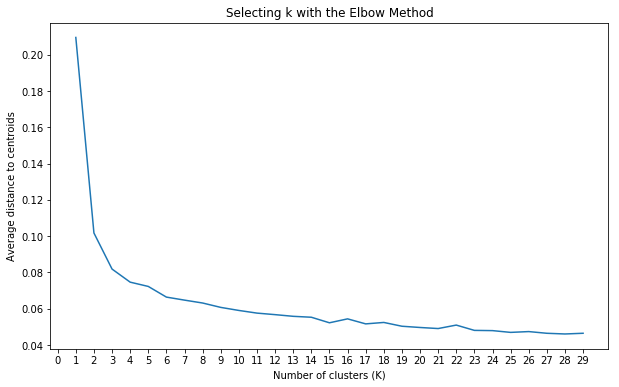

In [134]:
AR_feature = processing_dim_norm
clusters=range(1,30)
meandist=[]

for k in clusters:
    model=KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(AR_feature)
    clusassign=model.predict(AR_feature)
    meandist.append(sum(np.min(cdist(AR_feature, model.cluster_centers_, 'euclidean'), axis=1)) / AR_feature.shape[0])

plt.figure(figsize=(10, 6))
plt.plot(clusters, meandist)
plt.xticks(np.arange(0, 30, 1))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average distance to centroids')
plt.title('Selecting k with the Elbow Method')
plt.show()

## K-means

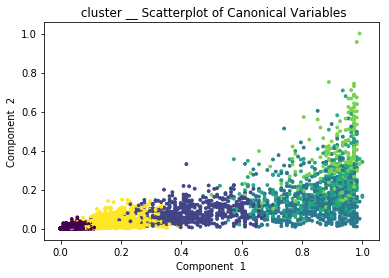

In [139]:
plot_columns = processing_dim_norm
km_model=KMeans(init='k-means++', n_clusters=6, n_init=10)
km_model.fit(plot_columns)
plt.figure(figsize=(6, 4))
plt.scatter(x=plot_columns[:,2], y=plot_columns[:,4], c=km_model.labels_,s=8)
plt.xlabel('Component  1')
plt.ylabel('Component  2')
plt.title(' cluster __ Scatterplot of Canonical Variables')
plt.show()

model2=km_model

## Results

In [140]:
cluslist=processing_dim.index
labels=list(model2.labels_)
newlist=dict(zip(cluslist, labels))

newclus=pd.DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']

newclus.reset_index(level=0, inplace=True)
newclus=newclus.rename(columns={'index':'anon_screen_name'})

processing_dim.reset_index(level=0, inplace=True)
Proc_merged_train=pd.merge(processing_dim, newclus, on='anon_screen_name')
Proc_merged_train.set_index("anon_screen_name",inplace=True)
Proc_merged_train.head(4)

,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_forum_post,problem_stay_min,problem_show,view_post,problem_showanswer_stay,interview_stay,outline,cluster
anon_screen_name,,,,,,,,,,,
0004d1505e4e9aed2b2e33d27346479310c1ba7e,54,5,21,0,69.888630,16,3,214.254413,0.000000,3,5
000789663d3e93ec98006ee1ca20563a81a526e9,0,0,0,0,0.000000,0,0,0.000000,0.000000,2,0
0007b27c8634f9ddfd20639135457d0cae09bac6,39,22,39,0,130.524008,40,0,1114.412145,709.427004,32,1
000950b2cdcd5d2c6fd54e139c8af7f99416dff6,41,13,14,0,49.296207,14,0,105.036606,0.000000,5,5


In [141]:
PROC=Proc_merged_train.groupby('cluster').agg({'mean'})
PROC

,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_forum_post,problem_stay_min,problem_show,view_post,problem_showanswer_stay,interview_stay,outline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
0,3.793323,1.519644,0.974490,0.000709,1.377912,0.639162,0.312416,20.024176,4.116238,2.850248
1,126.832192,24.193493,47.181507,0.083904,122.269261,47.135274,9.462329,2034.661000,622.166562,16.140411
2,92.236652,25.258297,92.782107,0.116883,218.025474,76.881674,13.116883,3050.460675,252.895663,18.281385
3,241.182418,45.663736,92.608791,0.538462,296.114059,92.769231,40.885714,3670.638440,1862.632339,27.731868
4,333.097643,66.117845,98.686869,1.235690,489.240158,151.447811,66.262626,9477.077651,921.937073,39.639731
5,45.471567,10.871781,16.905579,0.030043,38.403628,15.416309,2.724785,655.905105,275.917139,8.759657


In [146]:
Proc_merged_train.cluster.value_counts()

0    12701
5     1864
2      693
1      584
3      455
4      297
Name: cluster, dtype: int64

In [147]:
Proc_merged_train[Proc_merged_train.cluster==0]

,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_forum_post,problem_stay_min,problem_show,view_post,problem_showanswer_stay,interview_stay,outline,cluster
anon_screen_name,,,,,,,,,,,
000789663d3e93ec98006ee1ca20563a81a526e9,0,0,0,0,0.000000,0,0,0.000000,0.000000,2,0
0015786f39ecced09b87afde9b5234e8742c9afd,0,2,4,0,0.488875,0,0,0.000000,0.000000,5,0
0015dff4f499ac0548445bba4972e3f88261880e,13,9,1,0,0.240027,0,5,0.000000,0.000000,4,0
0016c933d75803665580624a7020ce2d748ec218,40,17,5,0,0.970428,0,0,0.000000,0.000000,2,0
001bfd76fa2ce4a4ba928d69fad0ffea7f38ebbc,0,0,0,0,0.000000,0,8,0.000000,0.000000,3,0
001c22cf55d449b5741a03cb02c80e837d3b43a6,0,0,0,0,0.000000,0,0,0.000000,0.000000,1,0
001f3b1d3a89487eaa97c1c84cb2e4feec7d59e5,0,0,0,0,0.000000,0,0,0.000000,0.000000,1,0
0022e1289b89727b8f81aee509dc1408ab8bfc3d,9,6,2,0,0.858610,4,0,67.160810,0.000000,4,0
002332ac45a3f046f5bbc2503f39639b10965a88,0,0,0,0,0.000000,0,0,0.000000,0.000000,1,0
